In [47]:
import pandas as pd
from scipy.stats import poisson
import numpy as np
import seaborn as sns
import random
import datetime
import pickle

In [48]:
pip install googlemaps

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\79520\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [49]:
import googlemaps
from datetime import datetime

#### read data

Read the initial dataset with patients

In [50]:
data = pd.read_csv('.../processed_ok_all_restore_ext.csv', on_bad_lines='skip',sep = ";", header= None)

In [51]:
data.columns = ['index', 'adress', 'lat', 'lon', 'final']

In [52]:
data

,index,adress,lat,lon,final
0,0,Пушкин Песочная 6 кв 12,59.729019,30.400148,ГБ №16
1,1,Будапештская 69 кор 2 кв 19,59.846138,30.386215,НИИ СП им. Джанелидзе
2,2,Петродворец Б Разведчика 14 кор 4 кв 38,59.876707,29.890929,ГБ №40
3,3,Солдата Корзуна 42 кв 73,59.831435,30.222416,НИИ СП им. Джанелидзе
4,4,"Стадион "" Петровский """,59.956949,30.276342,ГБ №1
...,...,...,...,...,...
5120,5120,"Курляндская ул., 32 - 81",59.911236,30.278570,ГБ №16
5121,5121,"Испытателей пр., 20 - 500",60.003745,30.292898,ГБ №2
5122,5122,"Олеко Дундича пр., 35-1",59.939095,30.315868,ГБ №26
5123,5123,"Академика Байкова ул., 17 - 1 - 125",60.026168,30.379316,ГБ №3


Leave the data within the city boundaries (without suburbs)

In [53]:
data_filtered_lat = data[data['lat'] <= 60.05]

In [54]:
data_filtered_lat = data_filtered_lat[data_filtered_lat['lat'] >= 59.8]

In [55]:
 data_filtered = data_filtered_lat[data_filtered_lat['lon'] < 30.6]

In [56]:
 data_filtered = data_filtered[data_filtered['lon'] >= 30.1]

In [57]:
coordinates_filtered = data_filtered[['lat', 'lon']].to_numpy()

In [58]:
len(coordinates_filtered)

3820

In [59]:
coordinates_filtered

array([[59.846138, 30.386215],
       [59.831435, 30.222416],
       [59.956949, 30.276342],
       ...,
       [59.939095, 30.315868],
       [60.026168, 30.379316],
       [59.876323, 30.401244]])

In [60]:
hosp_1 = [59.849212, 30.295701] #26 boln 
hosp_2 = [60.000713, 30.199033] #mhs
hosp_3 = [60.036281, 30.360164] 
hosp_4 = [59.879137, 30.468124]

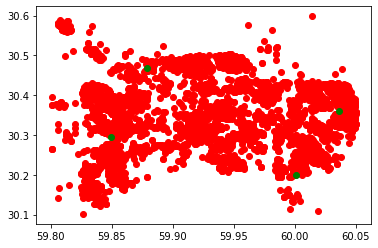

In [61]:
import matplotlib.pyplot as plt

plt.scatter(data_filtered.lat, data_filtered.lon, color="red") # plotting single point
plt.scatter(hosp_1[0], hosp_1[1], color = "green" )
plt.scatter(hosp_2[0], hosp_2[1], color = "green" )
plt.scatter(hosp_3[0], hosp_3[1], color = "green" )
plt.scatter(hosp_4[0], hosp_4[1], color = "green" )
plt.show()

In [62]:
data_hours = pd.read_csv('.../hours.csv', on_bad_lines='skip',sep = ",", header= 0)

In [63]:
data_hours

,Unnamed: 0,Час
0,0,0.043853
1,1,0.030932
2,2,0.023101
3,3,0.020752
4,4,0.023493
5,5,0.019773
6,6,0.014879
7,7,0.027604
8,8,0.024863
9,9,0.043657


#### gmaps dist functions by hospitals

In [64]:
gmaps = googlemaps.Client(key='') #removed 

Function that count the real distance from the location of patient to the first hospital

In [65]:
def gmaps_distance_one(startloc, hour,  endloc= hosp_1):
    directions_result = gmaps.directions(startloc,
                                     endloc,
                                     mode="driving",
                                     avoid="ferries",
                                     departure_time= datetime(year = 2024, month = np.random.choice(np.arange(1, 13)), day= np.random.choice(np.arange(1, 29)) , hour= hour)
                                    )
    return directions_result[0]['legs'][0]['duration']['value'] / 5400 # делим на макс время ввсек 1 h 30 m == 

Function that count the real distance from the location of patient to the second hospital

In [66]:
def gmaps_distance_two(startloc, hour,  endloc= hosp_2):
    directions_result = gmaps.directions(startloc,
                                     endloc,
                                     mode="driving",
                                     avoid="ferries",
                                     departure_time= datetime(year = 2024, month = np.random.choice(np.arange(1, 13)), day= np.random.choice(np.arange(1, 29)) , hour= hour)
                                    )
    return directions_result[0]['legs'][0]['duration']['value'] / 5400 # делим на макс время ввсек 1 h 30 m == 

Function that count the real distance from the location of patient to the third hospital

In [67]:
def gmaps_distance_three(startloc, hour,  endloc= hosp_3):
    directions_result = gmaps.directions(startloc,
                                     endloc,
                                     mode="driving",
                                     avoid="ferries",
                                     departure_time= datetime(year = 2024, month = np.random.choice(np.arange(1, 13)), day= np.random.choice(np.arange(1, 29)) , hour= hour)
                                    )
    return directions_result[0]['legs'][0]['duration']['value'] / 5400 # делим на макс время ввсек 1 h 30 m == 

Function that count the real distance from the location of patient to the fourth hospital

In [68]:
def gmaps_distance_four(startloc, hour,  endloc= hosp_4):
    directions_result = gmaps.directions(startloc,
                                     endloc,
                                     mode="driving",
                                     avoid="ferries",
                                     departure_time= datetime(year = 2024, month = np.random.choice(np.arange(1, 13)), day= np.random.choice(np.arange(1, 29)) , hour= hour)
                                    )
    return directions_result[0]['legs'][0]['duration']['value'] / 5400 # делим на макс время ввсек 1 h 30 m == 

#### gmaps dist by hours

We devide the day into four the most representative time slots: 8AM, 3PM, 7PM and 11PM.

##### hospital 1 


Functions that count the real distance from the location of patient to the first hospital in each time slots

In [69]:
one_hosp_first_time = []
for i in range(len(coordinates_filtered)):
    if i % 100 == 0:
        print(i)
    patient=coordinates_filtered[i]
    one_hosp_first_time.append(gmaps_distance_one(patient, 8))
# open a file, where you ant to store the data
file = open('one_hosp_first_time', 'wb')

# dump information to that file
pickle.dump(one_hosp_first_time, file)
file.close()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800


In [75]:
one_hosp_second_time = []
for i in range(len(coordinates_filtered)):
    if i % 100 == 0:
        print(i)
    patient=coordinates_filtered[i]
    one_hosp_second_time.append(gmaps_distance_one(patient, 15))
# open a file, where you ant to store the data
file = open('one_hosp_second_time', 'wb')

# dump information to that file
pickle.dump(one_hosp_second_time, file)
file.close()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800


In [76]:
one_hosp_third_time = []
for i in range(len(coordinates_filtered)):
    if i % 100 == 0:
        print(i)
    patient=coordinates_filtered[i]
    one_hosp_third_time.append(gmaps_distance_one(patient, 19))
# open a file, where you ant to store the data
file = open('one_hosp_third_time', 'wb')

# dump information to that file
pickle.dump(one_hosp_third_time, file)
file.close()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800


In [77]:
one_hosp_forth_time = []
for i in range(len(coordinates_filtered)):
    if i % 100 == 0:
        print(i)
    patient=coordinates_filtered[i]
    one_hosp_forth_time.append(gmaps_distance_one(patient, 23))
# open a file, where you ant to store the data
file = open('one_hosp_forth_time', 'wb')

# dump information to that file
pickle.dump(one_hosp_forth_time, file)
file.close()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800


##### hospital 2


Functions that count the real distance from the location of patient to the second hospital in each time slots

In [46]:
two_hosp_first_time = []
for i in range(len(coordinates_filtered)):
    if i % 100 == 0:
        print(i)
    patient=coordinates_filtered[i]
    two_hosp_first_time.append(gmaps_distance_two(patient, 8))
# open a file, where you ant to store the data
file = open('two_hosp_first_time', 'wb')

# dump information to that file
pickle.dump(two_hosp_first_time, file)
file.close()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800


In [81]:
two_hosp_second_time = []
for i in range(len(coordinates_filtered)):
    if i % 100 == 0:
        print(i)
    patient=coordinates_filtered[i]
    two_hosp_second_time.append(gmaps_distance_two(patient, 15))
# open a file, where you ant to store the data
file = open('two_hosp_second_time', 'wb')

# dump information to that file
pickle.dump(two_hosp_second_time, file)
file.close()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800


In [82]:
two_hosp_third_time = []
for i in range(len(coordinates_filtered)):
    if i % 100 == 0:
        print(i)
    patient=coordinates_filtered[i]
    two_hosp_third_time.append(gmaps_distance_two(patient, 19))
# open a file, where you ant to store the data
file = open('two_hosp_third_time', 'wb')

# dump information to that file
pickle.dump(two_hosp_third_time, file)
file.close()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800


In [83]:
two_hosp_fourth_time = []
for i in range(len(coordinates_filtered)):
    if i % 100 == 0:
        print(i)
    patient=coordinates_filtered[i]
    two_hosp_fourth_time.append(gmaps_distance_two(patient, 23))
# open a file, where you ant to store the data
file = open('two_hosp_fourth_time', 'wb')

# dump information to that file
pickle.dump(two_hosp_fourth_time, file)
file.close()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800


##### hospital 3

Functions that count the real distance from the location of patient to the third hospital in each time slots

In [70]:
three_hosp_first_time = []
for i in range(len(coordinates_filtered)):
    if i % 100 == 0:
        print(i)
    patient=coordinates_filtered[i]
    three_hosp_first_time.append(gmaps_distance_three(patient, 8))
# open a file, where you ant to store the data
file = open('three_hosp_first_time', 'wb')

# dump information to that file
pickle.dump(three_hosp_first_time, file)
file.close()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800


In [84]:
three_hosp_second_time = []
for i in range(len(coordinates_filtered)):
    if i % 100 == 0:
        print(i)
    patient=coordinates_filtered[i]
    three_hosp_second_time.append(gmaps_distance_three(patient, 15))
# open a file, where you ant to store the data
file = open('three_hosp_second_time', 'wb')

# dump information to that file
pickle.dump(three_hosp_second_time, file)
file.close()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800


In [85]:
three_hosp_third_time = []
for i in range(len(coordinates_filtered)):
    if i % 100 == 0:
        print(i)
    patient=coordinates_filtered[i]
    three_hosp_third_time.append(gmaps_distance_three(patient, 19))
# open a file, where you ant to store the data
file = open('three_hosp_third_time', 'wb')

# dump information to that file
pickle.dump(three_hosp_third_time, file)
file.close()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800


In [86]:
three_hosp_fourth_time = []
for i in range(len(coordinates_filtered)):
    if i % 100 == 0:
        print(i)
    patient=coordinates_filtered[i]
    three_hosp_fourth_time.append(gmaps_distance_three(patient, 23))
# open a file, where you ant to store the data
file = open('three_hosp_fourth_time', 'wb')

# dump information to that file
pickle.dump(three_hosp_fourth_time, file)
file.close()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800


##### hospital 4


Functions that count the real distance from the location of patient to the fourth hospital in each time slots

In [71]:
four_hosp_first_time = []
for i in range(len(coordinates_filtered)):
    if i % 100 == 0:
        print(i)
    patient=coordinates_filtered[i]
    four_hosp_first_time.append(gmaps_distance_four(patient, 8))
# open a file, where you ant to store the data
file = open('four_hosp_first_time', 'wb')

# dump information to that file
pickle.dump(four_hosp_first_time, file)
file.close()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800


In [87]:
four_hosp_second_time = []
for i in range(len(coordinates_filtered)):
    if i % 100 == 0:
        print(i)
    patient=coordinates_filtered[i]
    four_hosp_second_time.append(gmaps_distance_four(patient, 15))
# open a file, where you ant to store the data
file = open('four_hosp_second_time', 'wb')

# dump information to that file
pickle.dump(four_hosp_second_time, file)
file.close()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800


In [88]:
four_hosp_third_time = []
for i in range(len(coordinates_filtered)):
    if i % 100 == 0:
        print(i)
    patient=coordinates_filtered[i]
    four_hosp_third_time.append(gmaps_distance_four(patient, 19))
# open a file, where you ant to store the data
file = open('four_hosp_third_time', 'wb')

# dump information to that file
pickle.dump(four_hosp_third_time, file)
file.close()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800


In [89]:
four_hosp_fourth_time = []
for i in range(len(coordinates_filtered)):
    if i % 100 == 0:
        print(i)
    patient=coordinates_filtered[i]
    four_hosp_fourth_time.append(gmaps_distance_four(patient, 23))
# open a file, where you ant to store the data
file = open('four_hosp_fourth_time', 'wb')

# dump information to that file
pickle.dump(four_hosp_fourth_time, file)
file.close()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800


#### data distance 

Receive our final file with distance values

In [90]:
import pandas as pd

#create pandas DataFrame
df_all = pd.DataFrame({
                       'one_hosp_first_time':one_hosp_first_time,
                       'two_hosp_first_time':two_hosp_first_time,
                       'three_hosp_first_time':three_hosp_first_time,
                       'four_hosp_first_time':four_hosp_first_time,
                       'one_hosp_second_time':one_hosp_second_time,
                       'two_hosp_second_time':two_hosp_second_time,
                       'three_hosp_second_time':three_hosp_second_time,
                       'four_hosp_second_time':four_hosp_second_time,
                       'one_hosp_third_time':one_hosp_third_time,
                       'two_hosp_third_time':two_hosp_third_time,
                       'three_hosp_third_time':three_hosp_third_time,
                       'four_hosp_third_time':four_hosp_third_time,
                       'one_hosp_forth_time':one_hosp_forth_time,
                       'two_hosp_fourth_time':two_hosp_fourth_time,
                       'three_hosp_fourth_time':three_hosp_fourth_time,
                       'four_hosp_fourth_time':four_hosp_fourth_time
                       })

In [92]:
df_all.to_csv('.../df_all_times_and_hospitals.csv')

In [94]:
df_all.tail()

,one_hosp_first_time,two_hosp_first_time,three_hosp_first_time,four_hosp_first_time,one_hosp_second_time,two_hosp_second_time,three_hosp_second_time,four_hosp_second_time,one_hosp_third_time,two_hosp_third_time,three_hosp_third_time,four_hosp_third_time,one_hosp_forth_time,two_hosp_fourth_time,three_hosp_fourth_time,four_hosp_fourth_time
3815,0.222407,0.304630,0.544259,0.379259,0.202963,0.304630,0.483333,0.393148,0.202963,0.304630,0.483333,0.393148,0.222407,0.304630,0.483333,0.379259
3816,0.349815,0.209630,0.228148,0.443704,0.349815,0.209630,0.228148,0.443704,0.349815,0.209630,0.228148,0.519259,0.349815,0.209630,0.228148,0.443704
3817,0.355000,0.350741,0.393519,0.351667,0.355000,0.350741,0.393519,0.351667,0.355000,0.350741,0.393519,0.351667,0.355000,0.350741,0.386667,0.351667
3818,0.492222,0.352037,0.071667,0.417037,0.492222,0.352037,0.071667,0.417037,0.507963,0.352037,0.071667,0.417037,0.492222,0.352037,0.071667,0.417037
3819,0.295926,0.450370,0.489815,0.164074,0.295926,0.450370,0.489815,0.164074,0.288333,0.450370,0.511852,0.164074,0.288333,0.450370,0.489815,0.164074
